In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    '''
    for filename in filenames:
        print(os.path.join(dirname, filename))
    '''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = datasets.ImageFolder(root = '../input/natural-images/natural_images',
                               transform = transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle = True)

In [16]:
import torch.nn as nn
import torch.functional as F

class BasicCnn(nn.Module) :
    def __init__(self, output_shape = 8) :
        super().__init__()
        self.cnnModel = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1), #112
            nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
            nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1), #56
            nn.Conv2d(64, 64, kernel_size = 3, stride = 1, padding = 1),
            nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1), #28
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1), #14
            nn.Conv2d(128, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1), #7
            nn.AdaptiveAvgPool2d((1,1)) #flatten
        )
        
        self.dnnModel = nn.Sequential(
            nn.Linear(128, 64),
            nn.Linear(64, 32),
            nn.Linear(32, output_shape)
        )
        
    def forward(self, x) :
        output = self.cnnModel(x)
        output = output.squeeze()
        output = self.dnnModel(output)
        return output
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BasicCnn(8).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss().to(device)

In [17]:
from tqdm.notebook import tqdm

epoch_num = 30

for epoch in range(epoch_num) :
    epoch_loss = 0
    epoch_acc = 0
    for x, y in tqdm(dataloader) :
        x = x.to(device)
        y = y.to(device)
        predict = model(x)
        loss = criterion(predict, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss / len(dataloader)
        correct_prediction = torch.argmax(predict, 1) == y
        correct_prediction = correct_prediction.sum()
        epoch_acc += correct_prediction
        
    epoch_acc = epoch_acc / (32 * len(dataloader))
    print('Epoch : {}/{},   loss : {:.5f},    acc : {:.5f}'.format(epoch+1, epoch_num, epoch_loss, epoch_acc))
    
    if epoch_acc > 0.98 and epoch_loss < 0.05 :
        print('early stop')
        break

  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 1/30,   loss : 2.87624,    acc : 0.46672


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 2/30,   loss : 1.01598,    acc : 0.65509


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 3/30,   loss : 0.82155,    acc : 0.71528


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 4/30,   loss : 0.64959,    acc : 0.77677


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 5/30,   loss : 36978.89062,    acc : 0.43634


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 6/30,   loss : 69.80608,    acc : 0.69401


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 7/30,   loss : 27.23755,    acc : 0.76201


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 8/30,   loss : 14.10578,    acc : 0.80657


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 9/30,   loss : 9.35092,    acc : 0.82161


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 10/30,   loss : 7.66954,    acc : 0.82465


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 11/30,   loss : 7.42862,    acc : 0.81959


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 12/30,   loss : 7.34810,    acc : 0.82277


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 13/30,   loss : 5.27265,    acc : 0.84418


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 14/30,   loss : 4.80864,    acc : 0.83840


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 15/30,   loss : 4.84101,    acc : 0.83449


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 16/30,   loss : 4.83909,    acc : 0.83377


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 17/30,   loss : 4.31095,    acc : 0.84317


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 18/30,   loss : 3.48473,    acc : 0.84925


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 19/30,   loss : 3.60654,    acc : 0.84780


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 20/30,   loss : 3.19896,    acc : 0.84968


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 21/30,   loss : 2.91555,    acc : 0.84780


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 22/30,   loss : 2.78883,    acc : 0.84679


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 23/30,   loss : 2.66790,    acc : 0.85518


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 24/30,   loss : 3.52326,    acc : 0.83102


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 25/30,   loss : 3.69815,    acc : 0.82292


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 26/30,   loss : 1.99270,    acc : 0.86010


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 27/30,   loss : 1.37461,    acc : 0.88006


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 28/30,   loss : 2.17240,    acc : 0.84737


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 29/30,   loss : 2.84183,    acc : 0.82726


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch : 30/30,   loss : 1.90945,    acc : 0.85865


|          | 0/? [00:00<?, ?it/s]

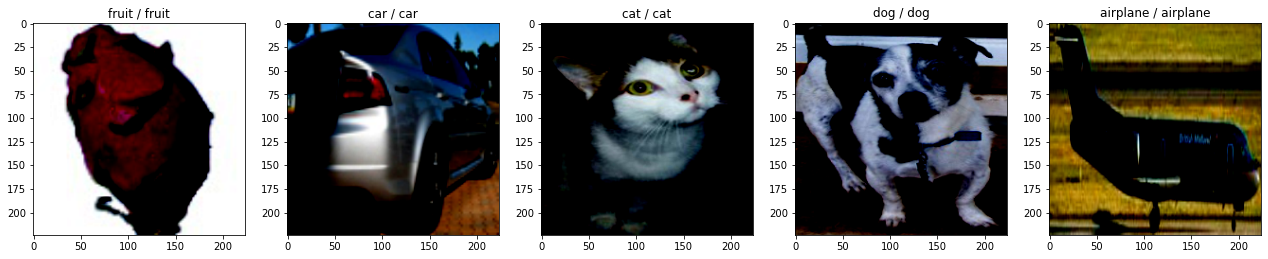

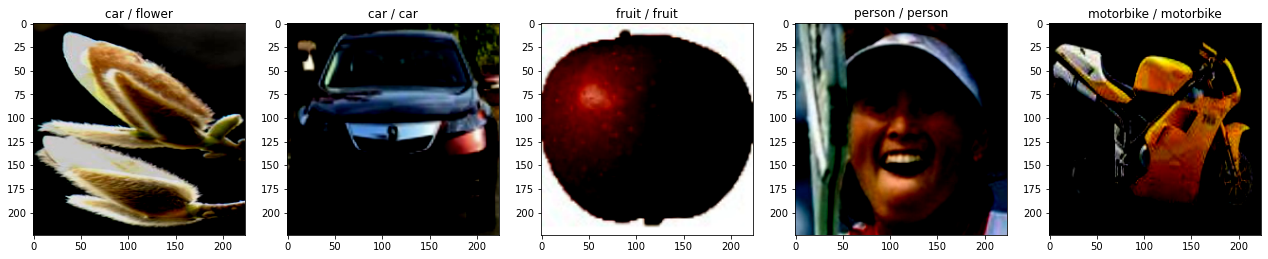

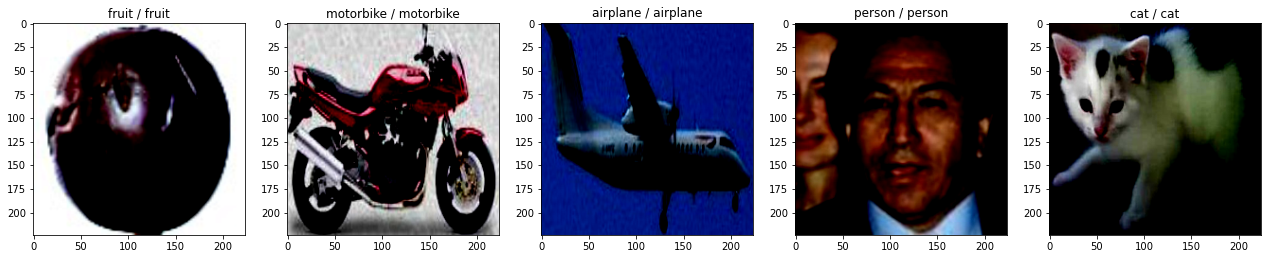

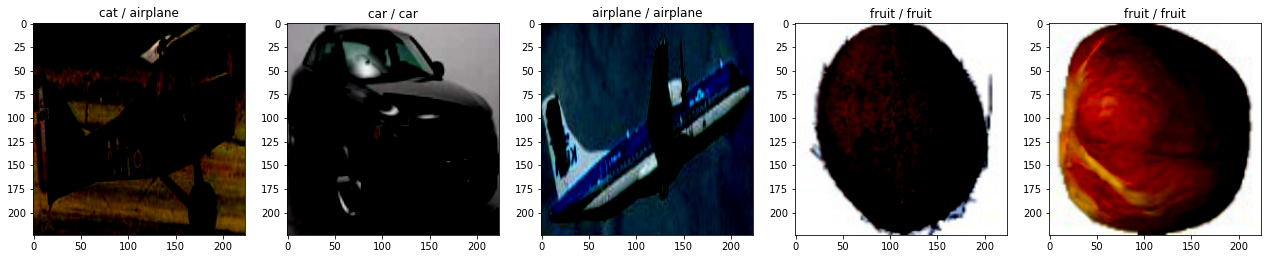

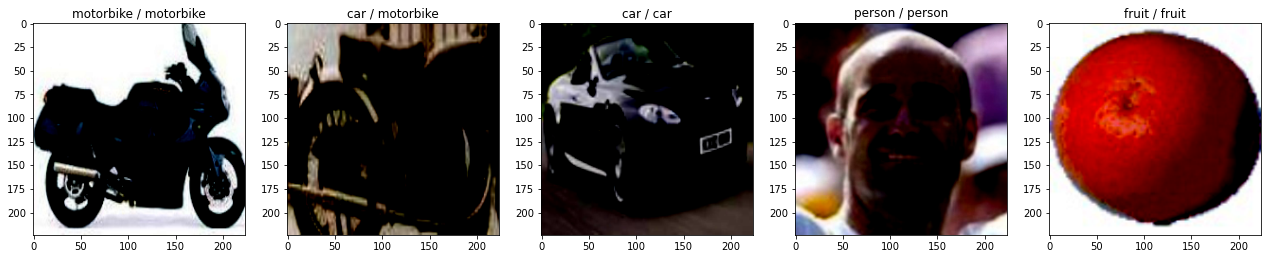

In [18]:
import matplotlib.pyplot as plt

predict_list = [1, 5, 12, 19, 28]
label_list = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

for cnt, (x, y) in tqdm(enumerate(dataloader)) :
    fig = plt.figure(figsize = (22,22))
    for i, num in enumerate(predict_list) :
        x_ = x[num].reshape(1, 3, 224, 224)
        y_ = y[num]
        x_ = x_.to(device)
        y_ = y_.to(device)

        with torch.no_grad() :
            predict = model(x_)
        
        x_ = x_.reshape((3, 224, 224)).to('cpu').numpy()
        subplot = fig.add_subplot(1, 5, i+1)
        subplot.set_title(label_list[predict.argmax()] + ' / ' + label_list[y_.item()])
        subplot.imshow(x_.transpose(1, 2, 0))
    plt.show()
    
    if cnt == 4 : break